# Employee Exit Surveys

In [1]:
import pandas as pd
import numpy as np

In [2]:
dete_survey = pd.read_csv ('dete_survey.csv', na_values='Not Stated')
tafe_survey = pd.read_csv('tafe_survey.csv')

### Initial Observation

In [3]:
#dete_survey.info()

In [4]:
#tafe_survey.info()

In [5]:
#dete_survey.isnull().sum(axis=0)

In [6]:
dete_survey_updated = dete_survey.drop (list(dete_survey.columns[28:49]), axis=1)
tafe_survey_updated = tafe_survey.drop (list(tafe_survey.columns[17:66]), axis=1)

In [7]:
dete_survey_updated.columns = [x.lower().strip().replace(' ','_') for x in list (dete_survey_updated.columns)]

In [8]:
tafe_renames = {'Record ID': 'id',
'CESSATION YEAR': 'cease_date',
'Reason for ceasing employment': 'separationtype',
'Gender. What is your Gender?': 'gender',
'CurrentAge. Current Age': 'age',
'Employment Type. Employment Type': 'employment_status',
'Classification. Classification': 'position',
'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}

In [9]:
tafe_survey_updated.rename(columns=tafe_renames, inplace=True)

In [10]:
#tafe_survey_updated.columns

In [11]:
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [12]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [13]:
tafe_resignations = tafe_survey_updated [tafe_survey_updated['separationtype'] == 'Resignation']

In [14]:
dete_resignations =  dete_survey_updated [dete_survey_updated['separationtype'].str.match('Resignation')]

In [15]:
year = list (dete_resignations['cease_date'])
year = [str(y)[-4:] for y in year if y != 'nan']
dete_resignations['year'] = np.array (year)
dete_resignations['year'] = dete_resignations['year'].astype ('float')

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [16]:
tafe_resignations['year'] = tafe_resignations['cease_date']
# tafe_resignations['year'] = tafe_resignations['year'].astype ('float')

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [17]:
dete_resignations['year'].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: year, dtype: int64

In [18]:
tafe_resignations['year'].value_counts()

2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: year, dtype: int64

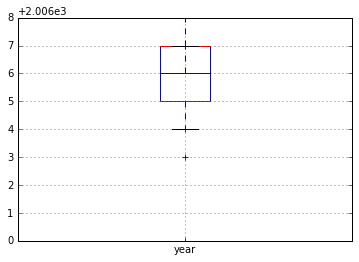

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
dete_resignations.boxplot(column=['year'])
tafe_resignations.boxplot(column=['year'])

### Secondary Observation

1. Years fixed, for checking range of employment
2. Need to combine and do analysis

In [23]:
dete_resignations['institute_service'] = dete_resignations['dete_start_date'] - dete_resignations['year']

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [24]:
dete_resignations.reset_index (inplace=True)
tafe_resignations.reset_index (inplace=True)

In [30]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [31]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [32]:
def update_vals(x):
    if pd.isnull(x) == True:
        return np.nan
    if x == '-':
        return False
    else:
        return True

In [39]:
tafe_factors = ['Contributing Factors. Dissatisfaction','Contributing Factors. Job Dissatisfaction']
tafe_resignations [tafe_factors] = tafe_resignations [tafe_factors].applymap (update_vals)

/dataquest/system/env/python3/lib/python3.4/site-packages/pandas/core/frame.py:2540: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [38]:
# tafe_resignations [factors] 

In [40]:
dete_factors = ['job_dissatisfaction','dissatisfaction_with_the_department','physical_work_environment','lack_of_recognition','lack_of_job_security','work_location','employment_conditions','work_life_balance','workload']

In [45]:
tafe_resignations['dissatisfied'] = tafe_resignations[tafe_factors].any(axis=1)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [46]:
dete_resignations['dissatisfied'] = dete_resignations[dete_factors].any(axis=1)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [48]:
dete_resignations_up = dete_resignations.copy()
tafe_resignations_up = tafe_resignations.copy()